In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

# Store data as dataframe
df = pd.read_csv('Data/MACCS_keys_PETadditives corrected.csv',index_col='No.')
df = df.dropna() #removing an NaN values

# filtering data to only show additives with addition method 'A' and amount added'0.25'
df_filtered = df[(df['Amount Added'] == 0.25)&(df['Addition Method'] == 'A')]
df_filtered = df_filtered.sort_values(by=['wet 3 day']) #Sort lowest to highest, for organization later

df_filtered.head(8) #only showing the first 8 results

,NAME,Addition Method,Amount Added,dry 1 hr,dry 2 hr,dry 3 hr,wet 3 day,wet 5 day,wet 15 day,MACCSFP1,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
No.,,,,,,,,,,,,,,,,,,,,,
15,P(OC1=CC=CC=C1)(OC2=CC=CC=C2)OC3=CC=CC=C3,A,0.25,67.5,56.0,48.1,0.0,0.0,0.0,0,...,1,0,1,0,0,1,1,1,1,0
1,CC1=CC=CC=C1N=C=NC2=CC=CC=C2C,A,0.25,68.5,59.0,50.7,18.8,0.0,0.0,0,...,0,1,0,1,1,1,1,0,1,0
10,OC1=NC2=CC=CC=C2N=C1O,A,0.25,70.7,60.0,51.8,41.3,12.0,0.0,0,...,1,0,1,0,1,1,1,1,1,0
52,C1(/C=C/C2=CC=CC=C2)=NC=CC(/C=C/C3=CC=CC=C3)=C1,A,0.25,73.2,62.8,54.3,42.7,13.0,0.0,0,...,0,0,0,0,1,1,1,0,1,0
51,O=C(NN1)C2=C(C1=O)C=CC=C2,A,0.25,73.5,64.2,55.1,43.2,13.5,4.5,0,...,0,1,1,0,1,1,1,1,1,0
9,O=C1N(C)N(C)C(C2=C1C=CC=C2)=O,A,0.25,71.2,62.8,52.1,43.7,11.3,0.0,0,...,0,1,1,1,1,1,1,1,1,0
12,O=C(OC)C1=CC=C(N(C)C)C=C1,A,0.25,71.3,62.1,53.8,45.0,13.1,0.0,0,...,1,1,1,1,1,1,1,1,1,0
40,OC1=NC2=CC=CC=C2N=C1,A,0.25,70.8,61.3,53.3,45.1,10.2,0.0,0,...,1,0,0,0,1,1,1,1,1,0


In [3]:
# Assign X and y dataframes:

y = df_filtered['wet 3 day'].values
df_X = df_filtered.iloc[:,9:]

print(df_X.shape)
print(y.shape)

(39, 166)
(39,)


[Text(0, 0.5, 'Variance'),
 Text(0.5, 0, 'Principal component #'),
 Text(0.5, 1.0, 'Cumulative Variance')]

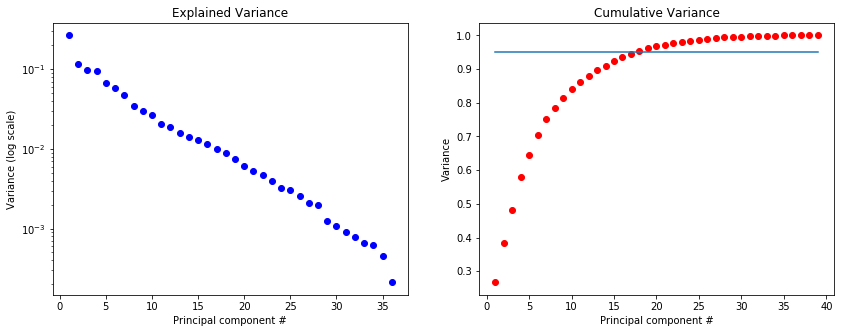

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

## Apply principal component analysis on the scaled set
pca = PCA()
pca.fit_transform(df_X)
fig, ax = plt.subplots(1,2,figsize=(14,5))

# Plots
N = pca.explained_variance_ratio_.shape[0]
line=np.ones(39)*0.95
ax[0].semilogy(1+np.arange(N-3), pca.explained_variance_ratio_[:-3], 'bo', label="Explained variance")
ax[1].plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), 'ro', label="Cumulative variance")
ax[1].plot(1+np.arange(N),line)
ax[0].set(xlabel='Principal component #', ylabel='Variance (log scale)',title='Explained Variance')
ax[1].set(xlabel='Principal component #', ylabel='Variance',title='Cumulative Variance')

In [5]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26686541, 0.3838414 , 0.48324203, 0.57828801, 0.64581577,
       0.70348261, 0.75094238, 0.78542178, 0.81501104, 0.84153112,
       0.86189332, 0.88053132, 0.89627145, 0.9103452 , 0.92330335,
       0.93494089, 0.94477376, 0.95374837, 0.96113228, 0.96724221,
       0.97250883, 0.97724629, 0.9812276 , 0.9844259 , 0.98745968,
       0.9899963 , 0.99207829, 0.99407646, 0.99531703, 0.99639109,
       0.99728843, 0.99806397, 0.99872451, 0.99934299, 0.99978974,
       1.        , 1.        , 1.        , 1.        ])

In [6]:
from sklearn.decomposition import PCA

n_components = 19

pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(df_X)

For n_clusters = 2 The average silhouette_score is : 0.22054686888278865
For n_clusters = 3 The average silhouette_score is : 0.1863234110915408
For n_clusters = 4 The average silhouette_score is : 0.23309259784866482
For n_clusters = 5 The average silhouette_score is : 0.28082439008971993
For n_clusters = 6 The average silhouette_score is : 0.31151194839465995
For n_clusters = 7 The average silhouette_score is : 0.3150815114930451
For n_clusters = 8 The average silhouette_score is : 0.3404950977975029
For n_clusters = 9 The average silhouette_score is : 0.3586083616294517
For n_clusters = 10 The average silhouette_score is : 0.37025711468220696


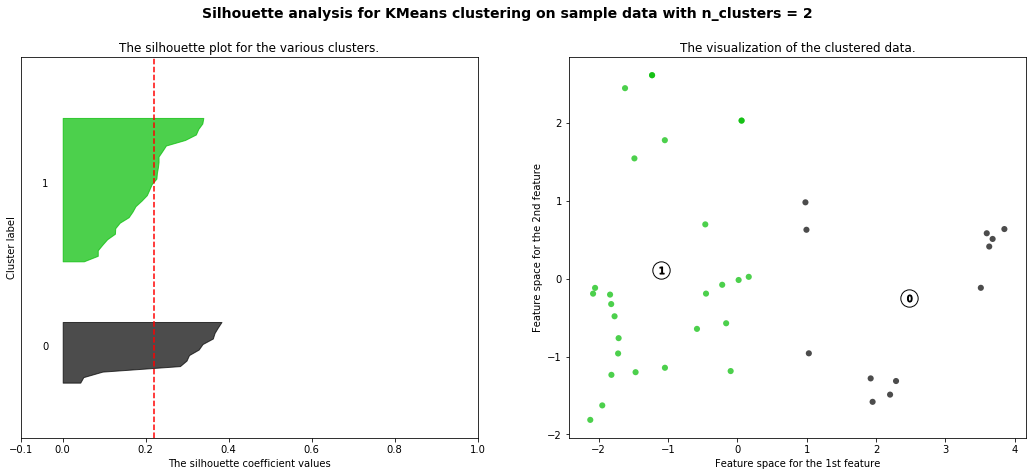

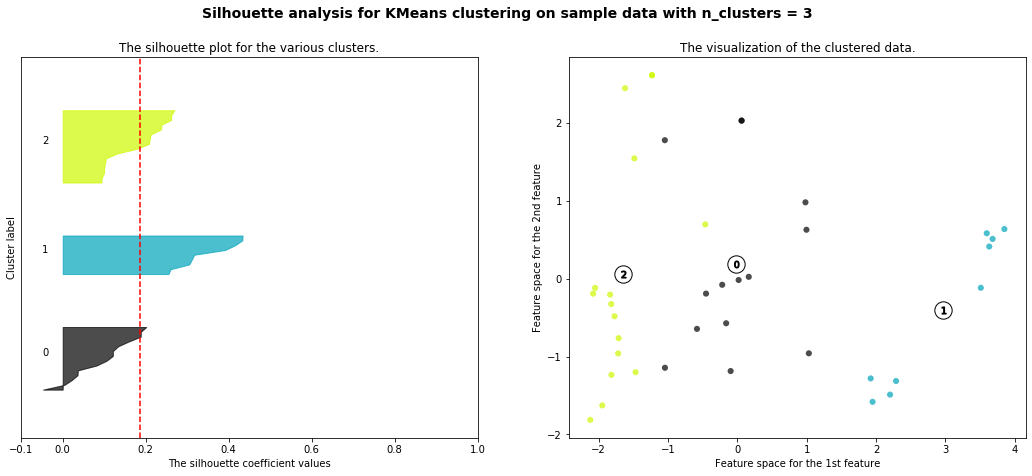

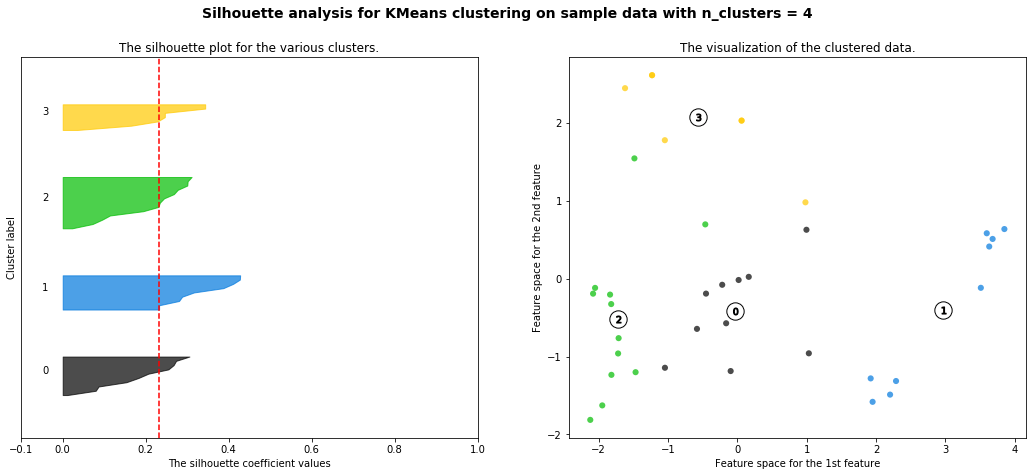

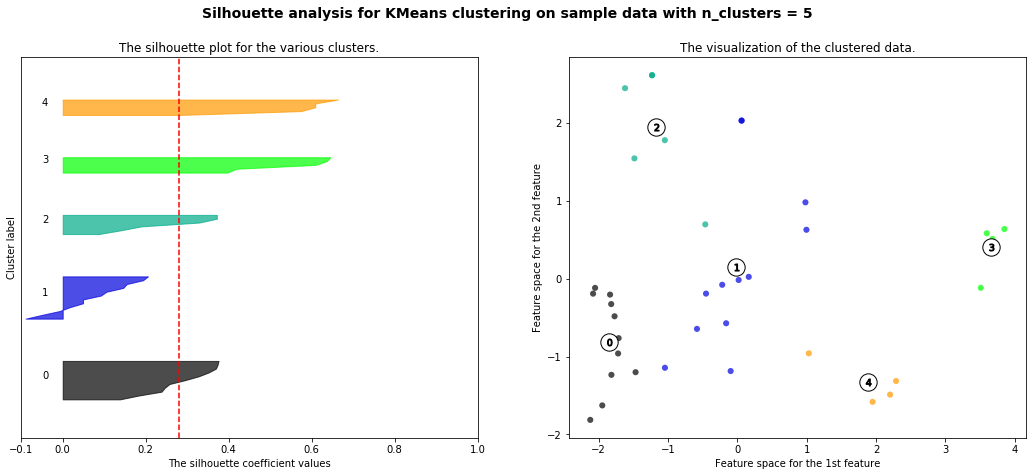

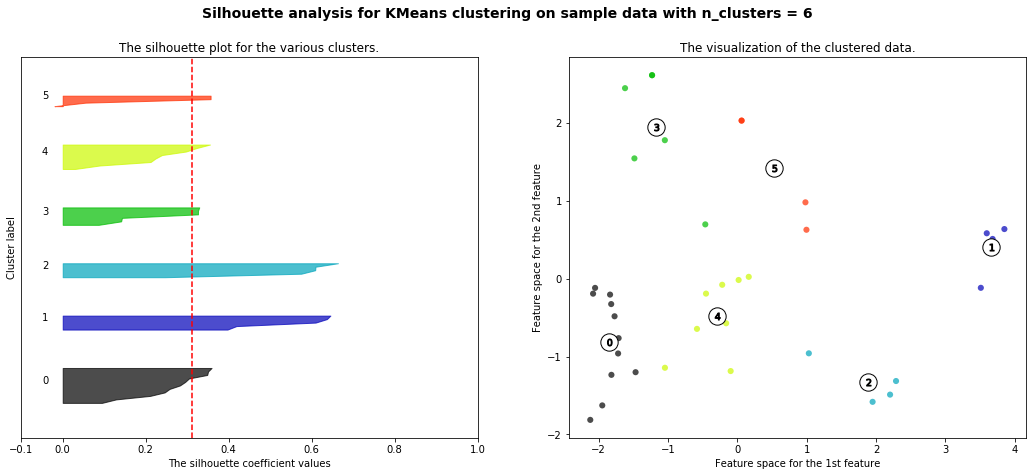

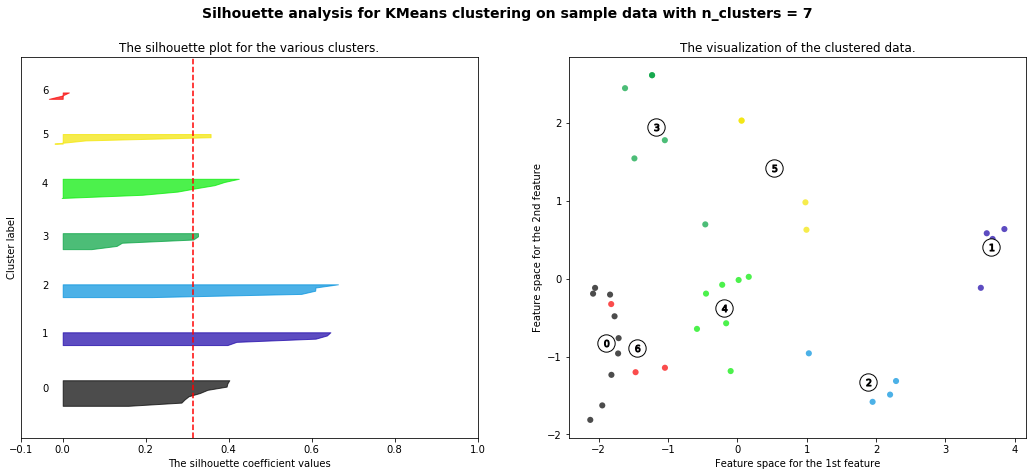

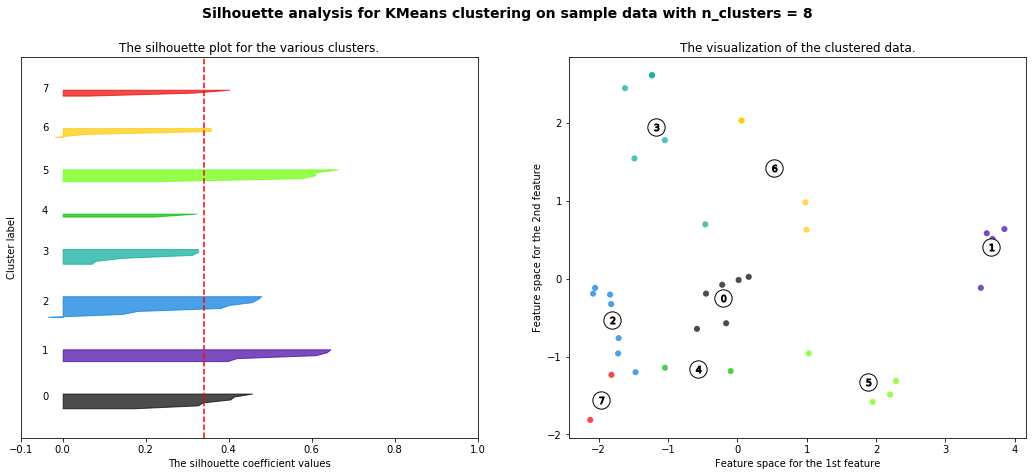

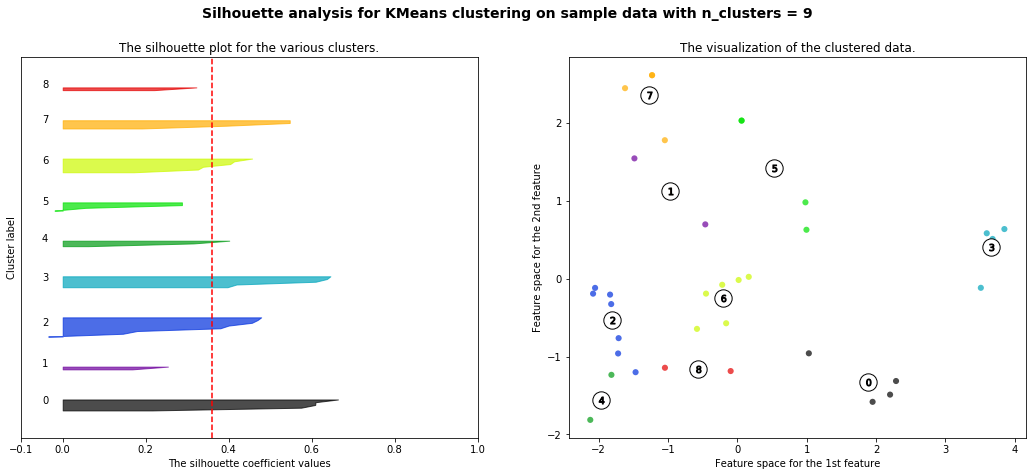

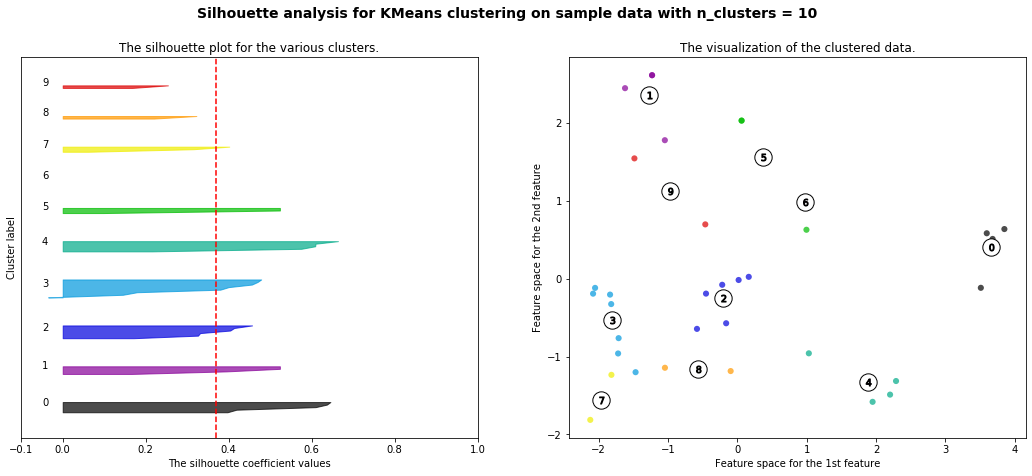

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

random_state = 40

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=150, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=300, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

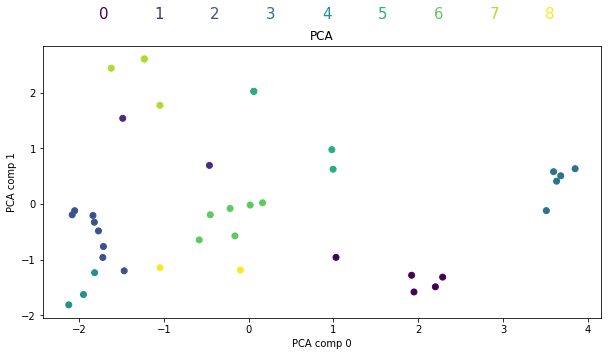

In [8]:
#generating labels
def add_labels(ax, cmap=plt.cm.viridis):
    colors = [cmap((i/8.)) for i in range(9)]
    xpos = 0.1
    for label in range(0,9):
        c = colors[label]
        ax.annotate(str(label), xy=[xpos, 1.1], xycoords='axes fraction', color=c, size=15)
        xpos += 0.1

#Applying k-means clustering
n_clusters = 9
model_labels = []
model_pca = KMeans(n_clusters=n_clusters, random_state=random_state)
model_pca.fit(X_pca)
y_predict_pca = model_pca.predict(X_pca)


fig,axes = plt.subplots(1, 1, figsize=(10,5))

#can vary
comp1 = 0
comp2 = 1

#plotting clusters
axes.scatter(X_pca[:,comp1], X_pca[:,comp2], c=y_predict_pca, cmap='viridis')
axes.set_xlabel('PCA comp {}'.format(comp1))
axes.set_ylabel('PCA comp {}'.format(comp2))
axes.set_title('PCA')

add_labels(axes)
    
model_labels_pca = model_pca.labels_

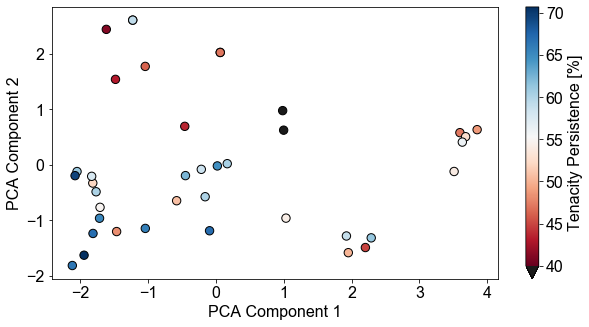

In [13]:
font = {'family' : 'arial',
        # 'weight' : 'bold',
        'size'   : 16}

cmap = plt.cm.get_cmap('RdBu')
cmap.set_under('0.1')

plt.rc('font', **font)

fig,axes = plt.subplots(1, 1, figsize=(10,5))


im = axes.scatter(    
    X_pca[:,comp1],
    X_pca[:,comp2],
    edgecolors='k',
    s=70,
    vmin = 40,
    c=y, 
    cmap=cmap,
)

# axes.legend(['Tenacity Persistence < 40%'],prop={'size': 16})

axes.set_xlabel('PCA Component {}'.format(comp1+1))
axes.set_ylabel('PCA Component {}'.format(comp2+1))


cbar = fig.colorbar(im, extend='min')
cbar.set_label('Tenacity Persistence [%]')

In [10]:
df_clusters = df_filtered[['NAME','wet 3 day']]
df_clusters.insert(2,"Cluster Number",model_labels_pca,True)
df_clusters.sort_values('Cluster Number')

,NAME,wet 3 day,Cluster Number
No.,,,
53,NC1=CC=C(C(OC)=O)C=C1,54.3,0
12,O=C(OC)C1=CC=C(N(C)C)C=C1,45.0,0
56,CN(C)C1=CC(N(C)C)=CC(C(OC)=O)=C1,61.3,0
54,CN(C)C1=CC=C(C(O)=O)C=C1,59.0,0
55,CN(C)C1=C(C(OC)=O)C=CC=C1,50.1,0
51,O=C(NN1)C2=C(C1=O)C=CC=C2,43.2,1
9,O=C1N(C)N(C)C(C2=C1C=CC=C2)=O,43.7,1
3,O=C(N1)C2=CC=CC(C(C)=O)=C2C1=O,55.1,2
2,O=C(N1)C2=CC=CC(CC3=CC=CC=C3)=C2C1=O,69.6,2
